

**Question 9.** 

Write a program to read the data from the following link, perform data analysis and answer the following
questions. 

Note - 1. Write code comments wherever required for code understanding  

Link - https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD 


Insights to be drawn -   
 - Get all the cars and their types that do not qualify for clean alternative fuel vehicle
 - Get all TESLA cars with the model year, and model type made in Bothell City.
 - Get all the cars that have an electric range of more than 100, and were made after 2015
 - Draw plots to show the distribution between city and electric vehicle type



In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('Electric_Vehicle_Population_Data.csv')

In [3]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJXCAE26J,Yakima,Yakima,WA,98908.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,14.0,141151601,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
1,JHMZC5F37M,Kitsap,Poulsbo,WA,98370.0,2021,HONDA,CLARITY,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,47,0,23.0,171566447,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303509e+10
2,5YJ3E1EB0K,King,Seattle,WA,98199.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,36.0,9426525,POINT (-122.40092 47.65908),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,1N4AZ0CP5D,King,Seattle,WA,98119.0,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,36.0,211807760,POINT (-122.3684 47.64586),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1E21H,Thurston,Lacey,WA,98516.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,22.0,185810306,POINT (-122.75379 47.06316),PUGET SOUND ENERGY INC,5.306701e+10


In [4]:
df.shape

(130443, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130443 entries, 0 to 130442
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         130443 non-null  object 
 1   County                                             130440 non-null  object 
 2   City                                               130440 non-null  object 
 3   State                                              130443 non-null  object 
 4   Postal Code                                        130440 non-null  float64
 5   Model Year                                         130443 non-null  int64  
 6   Make                                               130443 non-null  object 
 7   Model                                              130221 non-null  object 
 8   Electric Vehicle Type                              130443 non-null  object

In [6]:
df.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,130440.000000,130443.000000,130443.000000,130443.000000,130138.000000,1.304430e+05,1.304400e+05
mean,98167.633878,2019.554633,76.705718,1495.677346,29.577026,2.051796e+08,5.297177e+10
std,2492.197784,2.989137,99.421571,9844.748414,14.767508,8.710573e+07,1.640658e+09
min,1730.000000,1997.000000,0.000000,0.000000,1.000000,4.385000e+03,1.081042e+09
25%,98052.000000,2018.000000,0.000000,0.000000,18.000000,1.568004e+08,5.303301e+10
50%,98121.000000,2020.000000,23.000000,0.000000,34.000000,2.034934e+08,5.303303e+10
75%,98370.000000,2022.000000,151.000000,0.000000,43.000000,2.290791e+08,5.305307e+10
max,99701.000000,2023.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.603300e+10


In [7]:
df.isnull().sum()

VIN (1-10)                                             0
County                                                 3
City                                                   3
State                                                  0
Postal Code                                            3
Model Year                                             0
Make                                                   0
Model                                                222
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 305
DOL Vehicle ID                                         0
Vehicle Location                                      33
Electric Utility                                       3
2020 Census Tract                                      3
dtype: int64

### - Get all the cars and their types that do not qualify for clean alternative fuel vehicle

In [8]:
df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts()

Clean Alternative Fuel Vehicle Eligible                         60551
Eligibility unknown as battery range has not been researched    53446
Not eligible due to low battery range                           16446
Name: Clean Alternative Fuel Vehicle (CAFV) Eligibility, dtype: int64

Ans : Not eligible due to low battery range : 16446

In [9]:
df_not_eligible = df[df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] == 'Not eligible due to low battery range']

In [10]:
df_not_eligible.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
6,3FA6P0PU1G,Thurston,Tumwater,WA,98501.0,2016,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,19,0,22.0,347508836,POINT (-122.89166 47.03956),PUGET SOUND ENERGY INC,5.306701e+10
7,WA1F2AFY8P,Thurston,Lacey,WA,98516.0,2023,AUDI,Q5 E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,23,0,22.0,227213871,POINT (-122.75379 47.06316),PUGET SOUND ENERGY INC,5.306701e+10
8,1FADP5CU0E,Thurston,Rochester,WA,98579.0,2014,FORD,C-MAX,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,19,0,20.0,229811151,POINT (-123.08743 46.82175),PUGET SOUND ENERGY INC,5.306701e+10
14,1FADP5FU4H,Thurston,Lacey,WA,98513.0,2017,FORD,C-MAX,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,20,0,22.0,139887513,POINT (-122.81754499999994 46.98876000000007),PUGET SOUND ENERGY INC,5.306701e+10
15,KNDCM3LD8L,Kitsap,Bainbridge Island,WA,98110.0,2020,KIA,NIRO,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,23.0,157737730,POINT (-122.521 47.62728),PUGET SOUND ENERGY INC,5.303509e+10


In [11]:
df_not_eligible.shape

(16446, 17)

### - Get all TESLA cars with the model year, and model type made in Bothell City.

In [12]:
df['Make'].value_counts()

TESLA                   59629
NISSAN                  13023
CHEVROLET               11251
FORD                     6743
BMW                      5696
KIA                      5252
TOYOTA                   4770
VOLKSWAGEN               3432
VOLVO                    3113
AUDI                     2622
JEEP                     2328
HYUNDAI                  2144
CHRYSLER                 2139
RIVIAN                   1612
PORSCHE                   936
FIAT                      803
HONDA                     791
MINI                      728
MERCEDES-BENZ             711
MITSUBISHI                710
POLESTAR                  648
SMART                     276
SUBARU                    231
JAGUAR                    222
LINCOLN                   208
LUCID                     133
CADILLAC                  103
LEXUS                      64
GENESIS                    54
LAND ROVER                 41
FISKER                     14
AZURE DYNAMICS              7
WHEEGO ELECTRIC CARS        3
BENTLEY   

Number of cars made by TESLA = 59629

In [13]:
df_tesla_city = df[(df['Make'] == 'TESLA') & (df['City'] == 'Bothell')][['Model', 'Model Year']]

In [14]:
df_tesla_city

,Model,Model Year
39,MODEL 3,2020
217,MODEL 3,2022
218,MODEL Y,2022
222,MODEL 3,2018
292,MODEL X,2017
...,...,...
129778,MODEL 3,2019
129954,MODEL 3,2021
129976,MODEL S,2014
130295,MODEL 3,2022


We have 2407 results with criteria all TESLA cars with the model year, and model type made in Bothell City.

### - Get all the cars that have an electric range of more than 100, and were made after 2015

In [15]:
df_electricrange_year2015plus = df[(df['Electric Range'] > 100) & (df['Model Year'] >=2015)]

In [16]:
df_electricrange_year2015plus.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJXCAE26J,Yakima,Yakima,WA,98908.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,14.0,141151601,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
2,5YJ3E1EB0K,King,Seattle,WA,98199.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,36.0,9426525,POINT (-122.40092 47.65908),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1E21H,Thurston,Lacey,WA,98516.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,22.0,185810306,POINT (-122.75379 47.06316),PUGET SOUND ENERGY INC,5.306701e+10
12,5YJ3E1EC7L,Thurston,Lacey,WA,98503.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,0,22.0,2135486,POINT (-122.82324 47.04437),PUGET SOUND ENERGY INC,5.306701e+10
13,5YJ3E1EB2L,Thurston,Olympia,WA,98516.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322,0,22.0,124645363,POINT (-122.75379 47.06316),PUGET SOUND ENERGY INC,5.306701e+10


In [17]:
df_electricrange_year2015plus.shape

(35149, 17)

We have 35149 results for the criteria all the cars that have an electric range of more than 100, and were made after 2015.

### - Draw plots to show the distribution between city and electric vehicle type

In [18]:
df.head(1)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJXCAE26J,Yakima,Yakima,WA,98908.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,14.0,141151601,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10


In [19]:
df['City'].value_counts()

Seattle              22894
Bellevue              6748
Redmond               4820
Vancouver             4652
Kirkland              4071
                     ...  
Carmel By The Sea        1
Latah                    1
Old Lyme                 1
Frederick                1
Uniontown                1
Name: City, Length: 656, dtype: int64

<AxesSubplot:xlabel='Electric Vehicle Type', ylabel='count'>

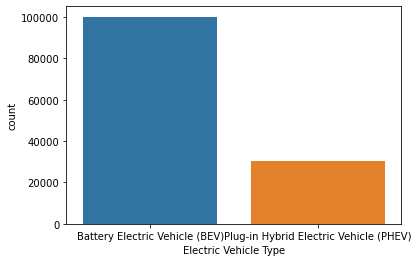

In [20]:
#plt.figure(figsize=(10,6))
#plot1 = sns.barplot(x = df['City'].value_counts()[:20,].index, y = df['City'].value_counts()[:20,], data = df, palette='rainbow')
#locs, labels = plt.xticks()
#plt.setp(labels, rotation=90)
#plt.show()

#sns.catplot(x="Electric Vehicle Type", kind="count", data=df, hue="City")
#plt.show()


sns.countplot(x = 'Electric Vehicle Type', data = df)